In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn streamlit joblib -q
!pip install streamlit-extras -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.8/680.8 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.4/635.4 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
import io

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving Car details v3.csv to Car details v3.csv


# Анализ и исследование данных

In [ ]:
df.shape

(8128, 13)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# Пропущенные значения
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

mileage      221
engine       221
max_power    215
torque       222
seats        221
dtype: int64


In [ ]:
# Статистические хар-ки
print(df.describe())

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


# Визуализация данных

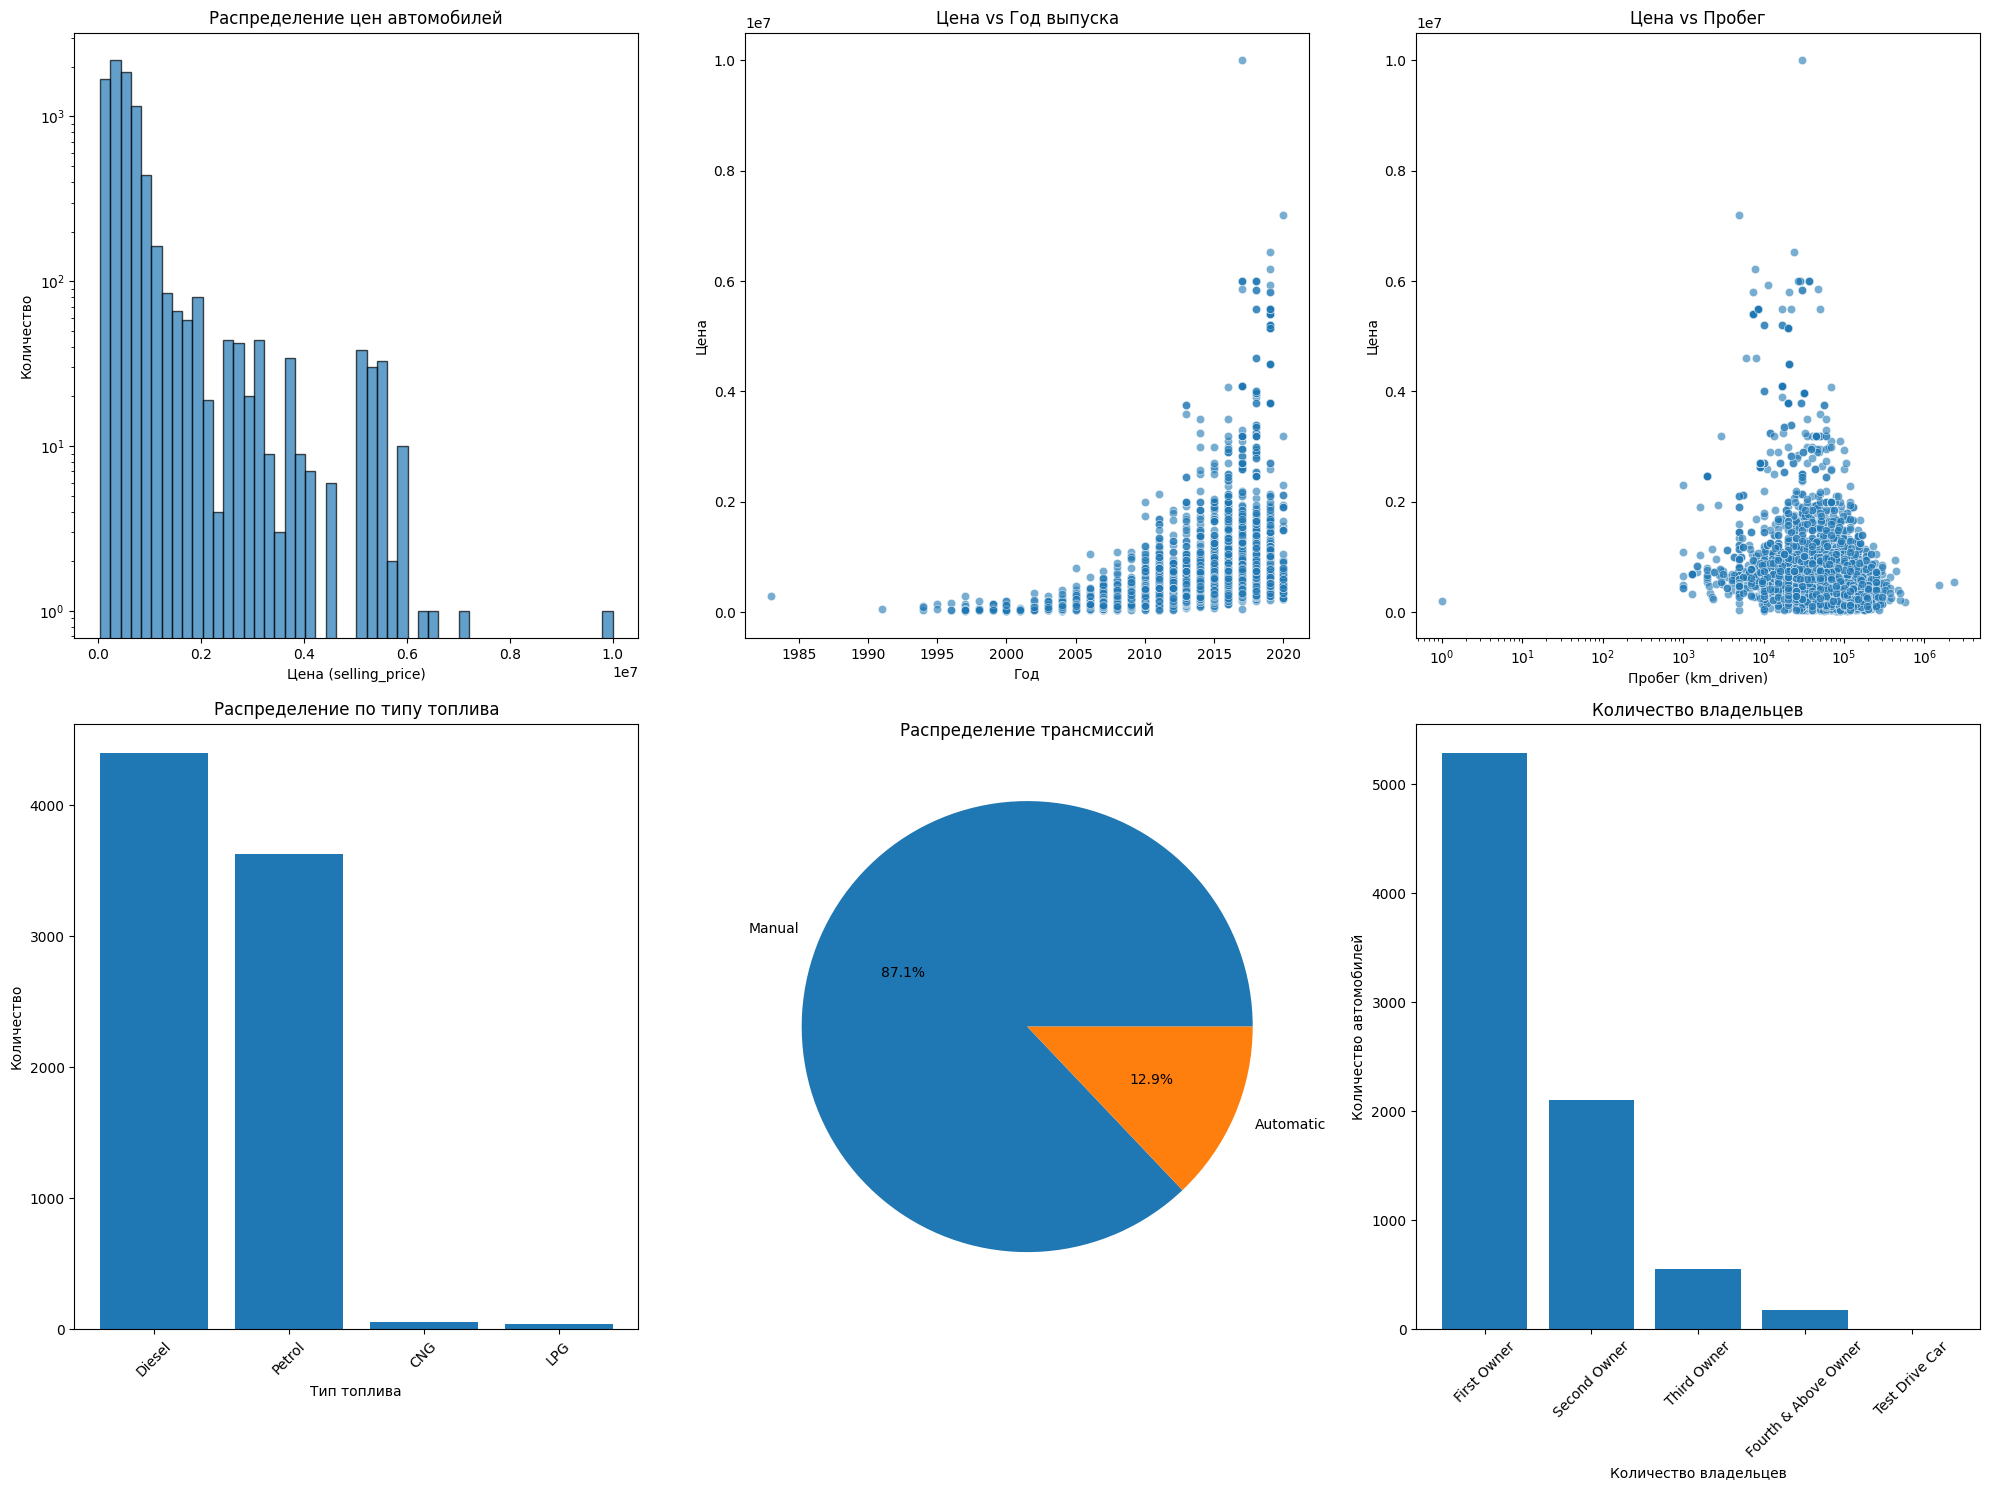

In [ ]:
plt.figure(figsize=(20, 15))
# Распределение цен
plt.subplot(2, 3, 1)
plt.hist(df['selling_price'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение цен автомобилей')
plt.xlabel('Цена (selling_price)')
plt.ylabel('Количество')
plt.yscale('log')

# 2. Зависимость цены от года
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)
plt.title('Цена vs Год выпуска')
plt.xlabel('Год')
plt.ylabel('Цена')

# 3. Зависимость цены от пробега
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='km_driven', y='selling_price', alpha=0.6)
plt.title('Цена vs Пробег')
plt.xlabel('Пробег (km_driven)')
plt.ylabel('Цена')
plt.xscale('log')

# 4. Тип топлива
plt.subplot(2, 3, 4)
fuel_counts = df['fuel'].value_counts()
plt.bar(fuel_counts.index, fuel_counts.values)
plt.title('Распределение по типу топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Количество')
plt.xticks(rotation=45)

# 5. Тип трансмиссии
plt.subplot(2, 3, 5)
transmission_counts = df['transmission'].value_counts()
plt.pie(transmission_counts.values, labels=transmission_counts.index, autopct='%1.1f%%')
plt.title('Распределение трансмиссий')

# 6. Количество владельцев
plt.subplot(2, 3, 6)
owner_counts = df['owner'].value_counts()
plt.bar(range(len(owner_counts)), owner_counts.values)
plt.xticks(range(len(owner_counts)), owner_counts.index, rotation=45)
plt.title('Количество владельцев')
plt.xlabel('Количество владельцев')
plt.ylabel('Количество автомобилей')

plt.tight_layout()
plt.show()

# Предобработка данных

In [ ]:
from sklearn.preprocessing import LabelEncoder
import re

df_processed = df.copy()

In [ ]:
df_processed = df.copy()

# 1. Обработка столбцов mileage и engine (удаляем единицы измерения)
def extract_numeric_advanced(value):
    if pd.isna(value):
        return np.nan

    if isinstance(value, str):
        # Удаляем пробелы и приводим к нижнему регистру
        value = str(value).strip().lower()

        # Ищем все числа (включая десятичные)
        numbers = re.findall(r'\d+\.?\d*', value)

        if numbers:
            return float(numbers[0])

    try:
        return float(value)
    except:
        return np.nan

# Применяем функцию к mileage и engine
df_processed['mileage'] = df_processed['mileage'].apply(extract_numeric_advanced)
df_processed['engine'] = df_processed['engine'].apply(extract_numeric_advanced)

# 2. Удаление пропущенных значений
initial_size = len(df_processed)
df_processed = df_processed.dropna()
print(f"Удалены пропуски. Удалено записей: {initial_size - len(df_processed)}")

# 3. Создание новых признаков
# Извлечение марки автомобиля из названия
df_processed['brand'] = df_processed['name'].str.split().str[0]

# Группируем редкие бренды (менее 5 автомобилей)
brand_counts = df_processed['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 5].index
df_processed['brand'] = df_processed['brand'].apply(lambda x: 'Other' if x in rare_brands else x)

# Создание признака возраста автомобиля
current_year = datetime.now().year
df_processed['car_age'] = current_year - df_processed['year']

# Создание интерактивных признаков
df_processed['price_per_km'] = df_processed['selling_price'] / (df_processed['km_driven'] + 1)
df_processed['age_mileage_ratio'] = df_processed['car_age'] / (df_processed['mileage'] + 1)

# 4. Обработка выбросов в ценах
# Удаляем только экстремальные выбросы (верхние и нижние 0.5%)
Q1 = df_processed['selling_price'].quantile(0.005)
Q3 = df_processed['selling_price'].quantile(0.995)
df_processed = df_processed[(df_processed['selling_price'] >= Q1) &
                           (df_processed['selling_price'] <= Q3)]

print(f"Удалены экстремальные выбросы в ценах. Новый размер: {df_processed.shape}")

# 5. Кодирование категориальных переменных
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Для owner используем порядковое кодирование
owner_mapping = {
    'First Owner': 0,
    'Second Owner': 1,
    'Third Owner': 2,
    'Fourth & Above Owner': 3
}
df_processed['owner_encoded'] = df_processed['owner'].map(owner_mapping)
# Заполняем пропуски медианным значением
df_processed['owner_encoded'] = df_processed['owner_encoded'].fillna(df_processed['owner_encoded'].median())

# Для fuel используем частотное кодирование
fuel_freq = df_processed['fuel'].value_counts(normalize=True)
df_processed['fuel_freq'] = df_processed['fuel'].map(fuel_freq)

# Для остальных категорий используем LabelEncoder
categorical_cols = ['seller_type', 'transmission', 'brand']
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# 6. Выбор финальных признаков
features = [
    'year', 'km_driven', 'mileage', 'engine', 'car_age',
    'owner_encoded', 'fuel_freq',
    'seller_type_encoded', 'transmission_encoded', 'brand_encoded',
    'price_per_km', 'age_mileage_ratio'
]

print(f"\nИтоговый набор ({len(features)}):")
for i, feature in enumerate(features, 1):
    print(f"{i:2d}. {feature}")

Удалены пропуски. Удалено записей: 222
Удалены экстремальные выбросы в ценах. Новый размер: (7868, 17)

Итоговый набор (12):
 1. year
 2. km_driven
 3. mileage
 4. engine
 5. car_age
 6. owner_encoded
 7. fuel_freq
 8. seller_type_encoded
 9. transmission_encoded
10. brand_encoded
11. price_per_km
12. age_mileage_ratio


# Разделение данных и обучение модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение на признаки и целевую переменную
X = df_processed[features]
y = df_processed['selling_price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"  Обучающая выборка: {X_train.shape}")
print(f"  Тестовая выборка: {X_test.shape}")
print(f"  Всего записей: {len(X_train) + len(X_test)}")

# Масштабирование числовых признаков
scaler = StandardScaler()

# Определяем числовые признаки
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'car_age',
                    'price_per_km', 'age_mileage_ratio']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

  Обучающая выборка: (6294, 12)
  Тестовая выборка: (1574, 12)
  Всего записей: 7868


In [ ]:
# Обучение модели
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Обучение Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    random_state=42,
    loss='huber'  # Устойчивая к выбросам функция потерь
)
model.fit(X_train_scaled, y_train)


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=5,
                          min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42, subsample=0.8)

In [ ]:
# Предсказания
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Оценка модели
print("Тренировочная выборка:")
print(f"  MAE: ₹{mean_absolute_error(y_train, y_pred_train):,.0f}")
print(f"  RMSE: ₹{np.sqrt(mean_squared_error(y_train, y_pred_train)):,.0f}")
print(f"  R²: {r2_score(y_train, y_pred_train):.4f}")

print("\nТестовая выборка:")
print(f"  MAE: ₹{mean_absolute_error(y_test, y_pred_test):,.0f}")
print(f"  RMSE: ₹{np.sqrt(mean_squared_error(y_test, y_pred_test)):,.0f}")
print(f"  R²: {r2_score(y_test, y_pred_test):.4f}")

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

Тренировочная выборка:
  MAE: ₹21,608
  RMSE: ₹60,621
  R²: 0.9937

Тестовая выборка:
  MAE: ₹32,343
  RMSE: ₹96,619
  R²: 0.9853


# Визуализация результатов модели

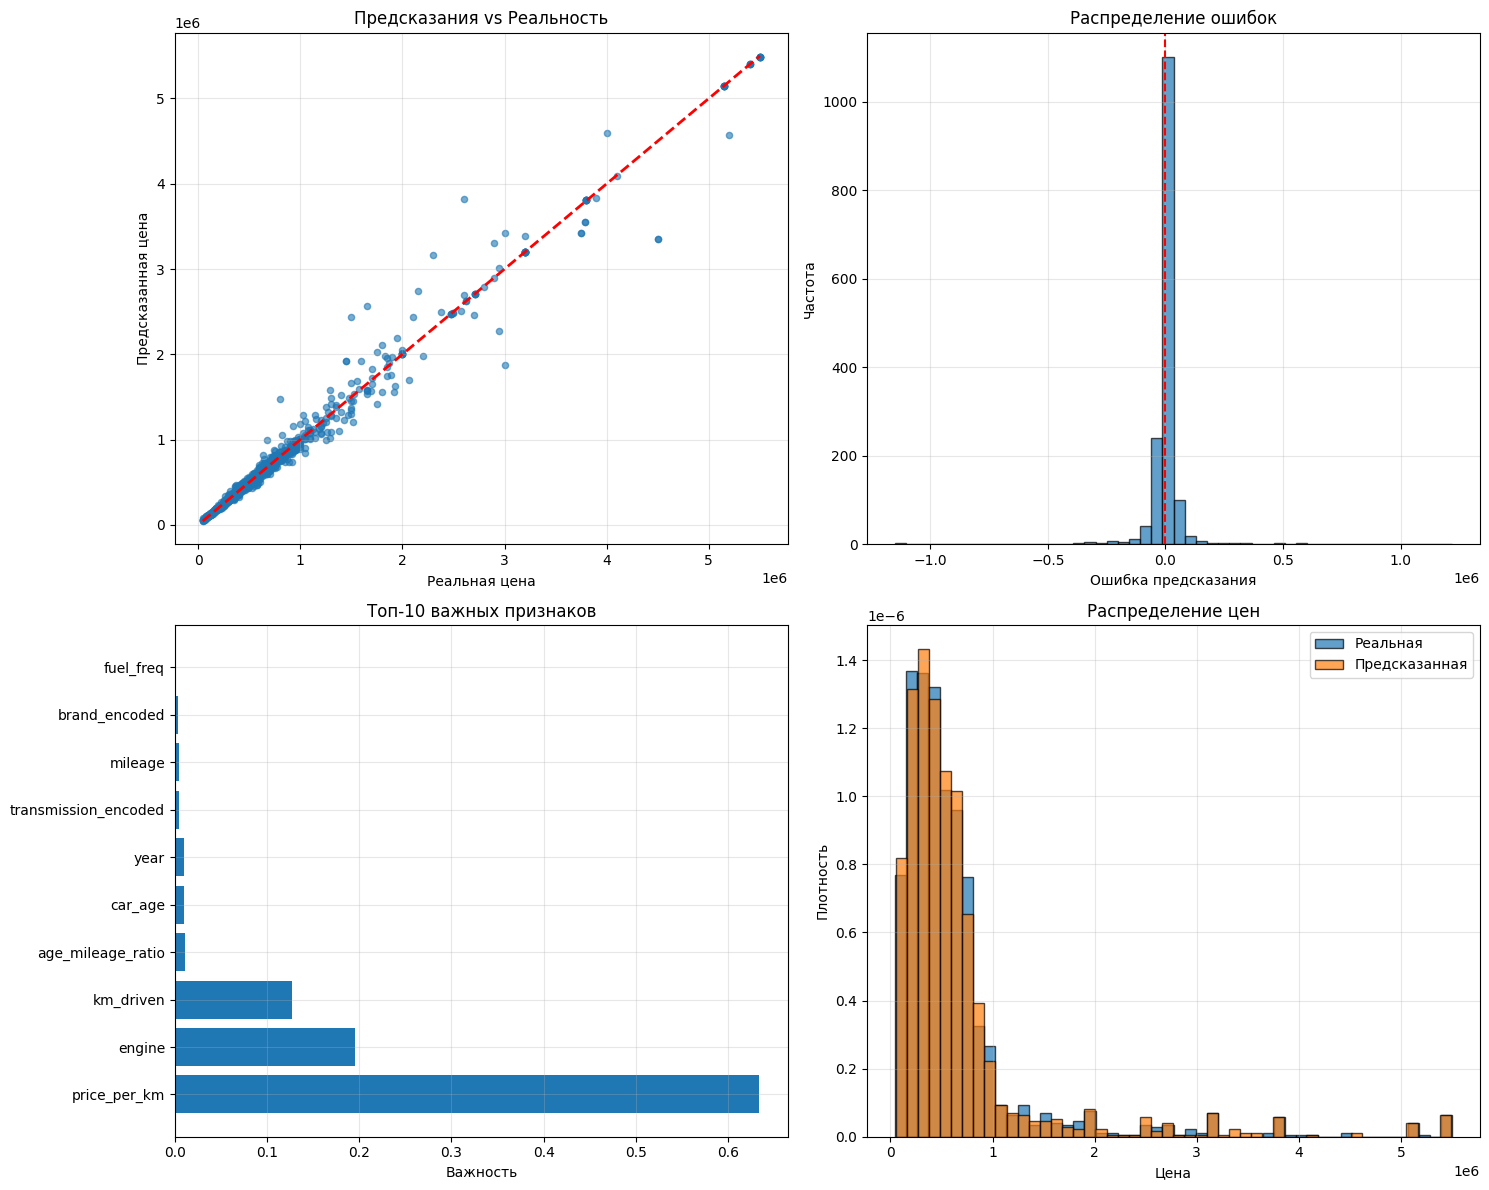

In [ ]:
# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Сравнение предсказаний с реальными значениями
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6, s=20)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Реальная цена')
axes[0, 0].set_ylabel('Предсказанная цена')
axes[0, 0].set_title('Предсказания vs Реальность')
axes[0, 0].grid(True, alpha=0.3)

# 2. Ошибки предсказаний
errors = y_pred_test - y_test
axes[0, 1].hist(errors, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Ошибка предсказания')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение ошибок')
axes[0, 1].grid(True, alpha=0.3)

# 3. Важность признаков
top_features = feature_importance.head(10)
axes[1, 0].barh(top_features['feature'], top_features['importance'])
axes[1, 0].set_xlabel('Важность')
axes[1, 0].set_title('Топ-10 важных признаков')
axes[1, 0].grid(True, alpha=0.3)

# 4. Распределение цен
axes[1, 1].hist(y_test, bins=50, alpha=0.7, label='Реальная', edgecolor='black', density=True)
axes[1, 1].hist(y_pred_test, bins=50, alpha=0.7, label='Предсказанная', edgecolor='black', density=True)
axes[1, 1].set_xlabel('Цена')
axes[1, 1].set_ylabel('Плотность')
axes[1, 1].set_title('Распределение цен')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сохранение модели

In [ ]:
import joblib
import pickle

# Создаем директорию для сохранения
!mkdir -p model_artifacts

joblib.dump(model, 'model_artifacts/car_price_model.pkl')
with open('model_artifacts/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
joblib.dump(scaler, 'model_artifacts/scaler.pkl')
with open('model_artifacts/feature_names.pkl', 'wb') as f:
    pickle.dump(features, f)

print("Модель и артефакты сохранены!")

Модель и артефакты сохранены!
